In [1]:
import pandas as pd

pasajeros = pd.read_csv('../_data/international-airline-passengers.csv', sep=";")

pasajeros.columns = ["mes", "pasajeros"]

In [2]:
pasajeros.head()

,mes,pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
pasajeros["pasajeros_1"] = pasajeros["pasajeros"].shift(-1)

In [4]:
pasajeros.tail()

,mes,pasajeros,pasajeros_1
139,1960-08,606,508.0
140,1960-09,508,461.0
141,1960-10,461,390.0
142,1960-11,390,432.0
143,1960-12,432,NaN


In [5]:
pasajeros = pasajeros.drop(143)

In [6]:
pasajeros_x = pasajeros["pasajeros"].astype(float).values
pasajeros_y = pasajeros["pasajeros_1"].astype(float).values


In [8]:
n_periodos = len(pasajeros)
pct_test = 0.2

n_train = int(n_periodos * (1-pct_test))
n_train

114

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(pasajeros_x.reshape(-1,1))

pasajeros_x_std = scaler.transform(pasajeros_x.reshape(-1,1))
pasajeros_y_std = scaler.transform(pasajeros_y.reshape(-1,1))

In [11]:
x_train = pasajeros_x_std[:n_train]
x_test = pasajeros_x_std[n_train:]

y_train = pasajeros_x_std[:n_train]
y_test = pasajeros_x_std[n_train:]

In [12]:
x_train = x_train.reshape(-1,1,1)
x_test = x_test.reshape(-1,1,1)

In [13]:
x_train.shape

(114, 1, 1)

In [18]:
from keras import Sequential
from keras.layers import Dense, LSTM, GRU

In [19]:
modelo_lstm = Sequential()
modelo_lstm.add(GRU(10, input_shape=(1,1)))
modelo_lstm.add(Dense(1))
modelo_lstm.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [25]:
modelo_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
modelo_lstm.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
114/114 [==============================] - 1s 8ms/step - loss: 0.8583 - mean_squared_error: 0.8583
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 0.5328 - mean_squared_error: 0.5328
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 0.3075 - mean_squared_error: 0.3075
Epoch 4/100
114/114 [==============================] - 0s 1ms/step - loss: 0.1630 - mean_squared_error: 0.1630
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 9/100
114/114 [==============================] - 0s 2ms/st

114/114 [==============================] - 0s 2ms/step - loss: 5.1598e-04 - mean_squared_error: 5.1598e-04
Epoch 70/100
114/114 [==============================] - 0s 2ms/step - loss: 4.7275e-04 - mean_squared_error: 4.7275e-04
Epoch 71/100
114/114 [==============================] - 0s 2ms/step - loss: 5.1859e-04 - mean_squared_error: 5.1859e-04
Epoch 72/100
114/114 [==============================] - 0s 2ms/step - loss: 5.2480e-04 - mean_squared_error: 5.2480e-04
Epoch 73/100
114/114 [==============================] - 0s 2ms/step - loss: 4.7607e-04 - mean_squared_error: 4.7607e-04
Epoch 74/100
114/114 [==============================] - 0s 2ms/step - loss: 4.8094e-04 - mean_squared_error: 4.8094e-04
Epoch 75/100
114/114 [==============================] - 0s 2ms/step - loss: 4.7318e-04 - mean_squared_error: 4.7318e-04
Epoch 76/100
114/114 [==============================] - 0s 2ms/step - loss: 3.9057e-04 - mean_squared_error: 3.9057e-04
Epoch 77/100
114/114 [==============================]

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_pred = scaler.inverse_transform(modelo_lstm.predict(x_train))
y_train_original = scaler.inverse_transform(y_train)
error_train = np.sqrt(mean_squared_error(y_train_original, train_pred))

error_train

1.9042049919654451

In [30]:
from sklearn.metrics import mean_squared_error

test_pred = scaler.inverse_transform(modelo_lstm.predict(x_test))
y_test_original = scaler.inverse_transform(y_test)
error_test = np.sqrt(mean_squared_error(y_test_original, test_pred))

error_test

16.8492572668912

In [33]:
test_pred_plot = np.zeros(pasajeros_y.shape)
test_pred_plot[-test_pred.shape[0]:] = test_pred[:,0]

test_pred_plot[:-test_pred.shape[0]] = np.nan

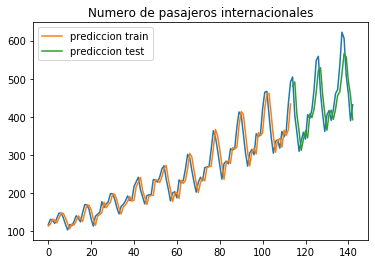

In [35]:
from matplotlib import pyplot as plt
plt.plot(pasajeros_y)
plt.plot(train_pred, label="prediccion train")
plt.plot(test_pred_plot, label="prediccion test")
plt.title("Numero de pasajeros internacionales")
plt.legend();